In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Data.zip

Archive:  /content/drive/MyDrive/Data.zip
   creating: Data/
   creating: Data/.ipynb_checkpoints/
   creating: Data/NORMAL/
  inflating: Data/NORMAL/NORMAL_983.png  
  inflating: Data/NORMAL/NORMAL_984.png  
  inflating: Data/NORMAL/NORMAL_992.png  
  inflating: Data/NORMAL/NORMAL_953.png  
  inflating: Data/NORMAL/NORMAL_961.png  
  inflating: Data/NORMAL/NORMAL_954.png  
  inflating: Data/NORMAL/NORMAL_96.png  
  inflating: Data/NORMAL/NORMAL_98.png  
  inflating: Data/NORMAL/NORMAL_997.png  
  inflating: Data/NORMAL/NORMAL_943.png  
  inflating: Data/NORMAL/NORMAL_927.png  
  inflating: Data/NORMAL/NORMAL_962.png  
  inflating: Data/NORMAL/NORMAL_933.png  
  inflating: Data/NORMAL/NORMAL_914.png  
  inflating: Data/NORMAL/NORMAL_919.png  
  inflating: Data/NORMAL/NORMAL_916.png  
  inflating: Data/NORMAL/NORMAL_880.png  
  inflating: Data/NORMAL/NORMAL_897.png  
  inflating: Data/NORMAL/NORMAL_859.png  
  inflating: Data/NORMAL/NORMAL_913.png  
  inflating: Data/NORMAL/NORMAL_873.p

In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as t

In [4]:
!rm -r /content/Data/.ipynb_checkpoints

In [5]:
Dataset = ImageFolder("/content/Data", transform = t.Compose([
    t.Resize((224,224)),
    t.ToTensor()
]))

In [6]:
len(Dataset)

1476

In [7]:
from torch.utils.data import random_split

In [8]:
train_size = int(len(Dataset) * 0.9)

In [9]:
train_size

1328

In [10]:
train_set, val_set = random_split(Dataset, [train_size, len(Dataset) - train_size])

In [11]:
len(train_set)

1328

In [12]:
len(val_set)

148

In [13]:
train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True)
test_dataloader = DataLoader(val_set, batch_size=8, shuffle=False)

In [14]:
len(train_dataloader)

42

In [15]:
len(test_dataloader)

19

In [16]:
batch = next(iter(train_dataloader))

In [17]:
images=batch[0]
labels=batch[1]

In [18]:
print(f"Shape of image is :{images.shape}")
print(f"Shape of label is :{labels.shape}")

Shape of image is :torch.Size([32, 3, 224, 224])
Shape of label is :torch.Size([32])


labels : tensor([2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2,
        1, 2, 2, 2, 2, 2, 0, 0])


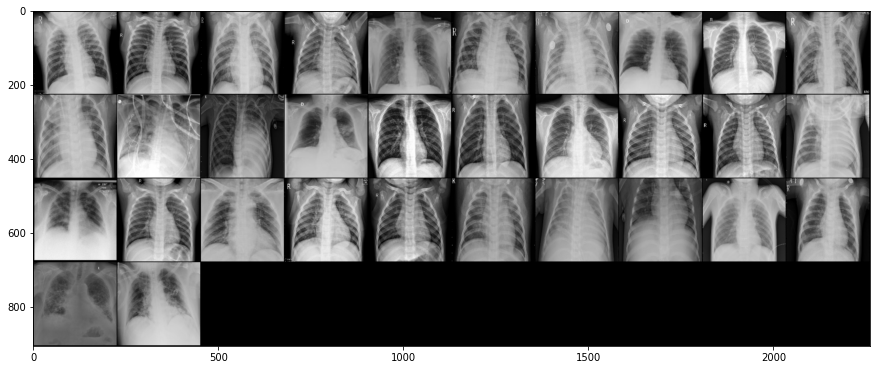

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"labels : {labels}")

In [20]:
test_batch = next(iter(test_dataloader))
test_images=test_batch[0]
test_labels=test_batch[1]
print(f"Shape of test image is :{test_images.shape}")
print(f"Shape of test label is :{test_labels.shape}")

Shape of test image is :torch.Size([8, 3, 224, 224])
Shape of test label is :torch.Size([8])


test labels : tensor([1, 1, 2, 1, 0, 2, 2, 0])


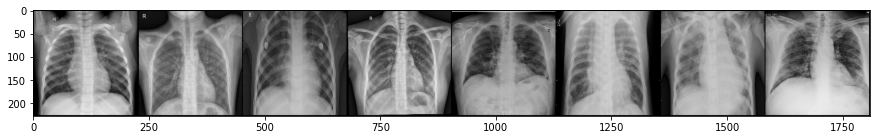

In [21]:
grid = torchvision.utils.make_grid(test_images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"test labels : {test_labels}")

In [22]:
import torch
import torch.nn as nn 
import torch.optim as optim

In [23]:
model = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [24]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [25]:
model.cuda()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [26]:
def correct_preds(preds,targets):
    return preds.argmax(dim=1).eq(targets).sum().item()

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(50):
  total_correct = 0
  total_loss = 0
  for  i,(images,targets) in enumerate(train_dataloader):
    images = images.to(device)
    targets = targets.to(device)

    preds = model(images)
    loss = criterion(preds, targets)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_correct += correct_preds(preds,targets)

  avg_loss = total_loss / len(train_dataloader)
  print("epoch:",epoch,"total_correct:",total_correct,"loss:",avg_loss)  

epoch: 0 total_correct: 616 loss: 3.7032945652802787
epoch: 1 total_correct: 984 loss: 0.6666182208628881
epoch: 2 total_correct: 1125 loss: 0.42576097945372265
epoch: 3 total_correct: 1138 loss: 0.3927865546374094
epoch: 4 total_correct: 1197 loss: 0.28850171856936957
epoch: 5 total_correct: 1198 loss: 0.27589161569873494
epoch: 6 total_correct: 1199 loss: 0.28255870565772057
epoch: 7 total_correct: 1202 loss: 0.28918960814674693
epoch: 8 total_correct: 1215 loss: 0.24540817577924048
epoch: 9 total_correct: 1221 loss: 0.2321331455771412
epoch: 10 total_correct: 1216 loss: 0.23905824825522445
epoch: 11 total_correct: 1235 loss: 0.2055281950604348
epoch: 12 total_correct: 1251 loss: 0.1616490384829896
epoch: 13 total_correct: 1226 loss: 0.2064360977106151
epoch: 14 total_correct: 1243 loss: 0.19226046052894422
epoch: 15 total_correct: 1237 loss: 0.18223112475659167
epoch: 16 total_correct: 1251 loss: 0.14829139659802118
epoch: 17 total_correct: 1252 loss: 0.17631680306623734
epoch: 18 t

In [34]:
Accuracy = (total_correct/len(train_set))*100
print(f"The train accuracy is {Accuracy}")

The train accuracy is 99.09638554216868


In [36]:
model.eval()
total_test_loss = 0
total_test_correct = 0

with torch.no_grad():
    for j, (test_images, test_targets) in enumerate(test_dataloader):
        test_images = test_images.to(device)
        test_targets = test_targets.to(device)

        test_preds = model(test_images)
        test_loss = criterion(test_preds, test_targets)
        total_test_loss += test_loss.item()
        total_test_correct += correct_preds(test_preds,test_targets)

avg_test_loss = total_test_loss / len(test_dataloader)
print("total_test_correct:",total_test_correct,"test_loss:",avg_test_loss) 

total_test_correct: 145 test_loss: 0.09287541162855537


In [37]:
test_accuracy = (total_test_correct/len(val_set))*100
print(f"The test accuracy is {test_accuracy}")

The test accuracy is 97.97297297297297
